# E2a: Küchentischversuch zum Laval-Rotor

Name:   Nilay Kuslugil

Datum:  19.12.23

## Forschungsfrage

"Kann ich die Vibrationen in meiner Umgebung mit einem Schwingungssensor messen?"

# Erster Versuch

Lautsprecher(Subwoofer)

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.


- Bild von Aufbau des Haushaltsgegenstands:

<img src="figures/lautsprecher_bild.jpg" width="800">

- Beschreibung des Aufbaus:

Der Schwingungssensor, der mit dem Rasperry Pi verbunden ist, wurde mit Klebeband auf den Subwoofer befestigt.


- Vorgangsbeschreibung:

Bei der Messung hab ich Musik laufen lassen. Somit wurden 20s lang die Frequenzen des Subwoofers durch den angebrachten Sensor gemessen. 

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [1]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [2]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

path_measurement_folder = "measurement_data/data_20231219_170557_NilayKuslugil_lautsprecher"
h5_file_name = "data_20231219_170557_NilayKuslugil_lautsprecher.h5" 

# ---------------------------------------------------------------------------------------------#1-end

In [3]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20231219_170557_NilayKuslugil_lautsprecher/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20231219_170557_NilayKuslugil_lautsprecher/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20231219_170557_NilayKuslugil_lautsprecher/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1ee847c5-6dd5-6ecf-aa58-0341b02a1b83": {
    "type": "probe",
    "name": "lautsprecher",
    "comment": "",
    "

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [5]:
file_path = os.path.join(path_measurement_folder, h5_file_name)
x_np = None
y_np = None
z_np = None
t_np = None

# Öffnen der HDF5-Datei im Lesemodus
with h5py.File(file_path, "r") as hdf_file:
    # Iteration über die Elemente in der Datei
    for group_name, group in hdf_file.items():
        print(f"Group: {group_name}")

        # Iteration über Datensätze in der Gruppe
        for dataset_name, dataset in group.items():
            values = np.array(dataset[:])

            if dataset_name == "acceleration_x":
                x_np = values
            elif dataset_name == "acceleration_y":
                y_np = values
            elif dataset_name == "acceleration_z":
                z_np = values
            elif dataset_name == "timestamp":
                t_np = values

Group: 1ee847be-fddd-6ee4-892a-68c4555b0981


#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [6]:
results = np.empty_like(x_np, dtype=float)

for i, (x_val, y_val, z_val) in enumerate(zip(x_np, y_np, z_np)):
    result = get_vec_accel(x_val, y_val, z_val)
    results[i] = result

#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

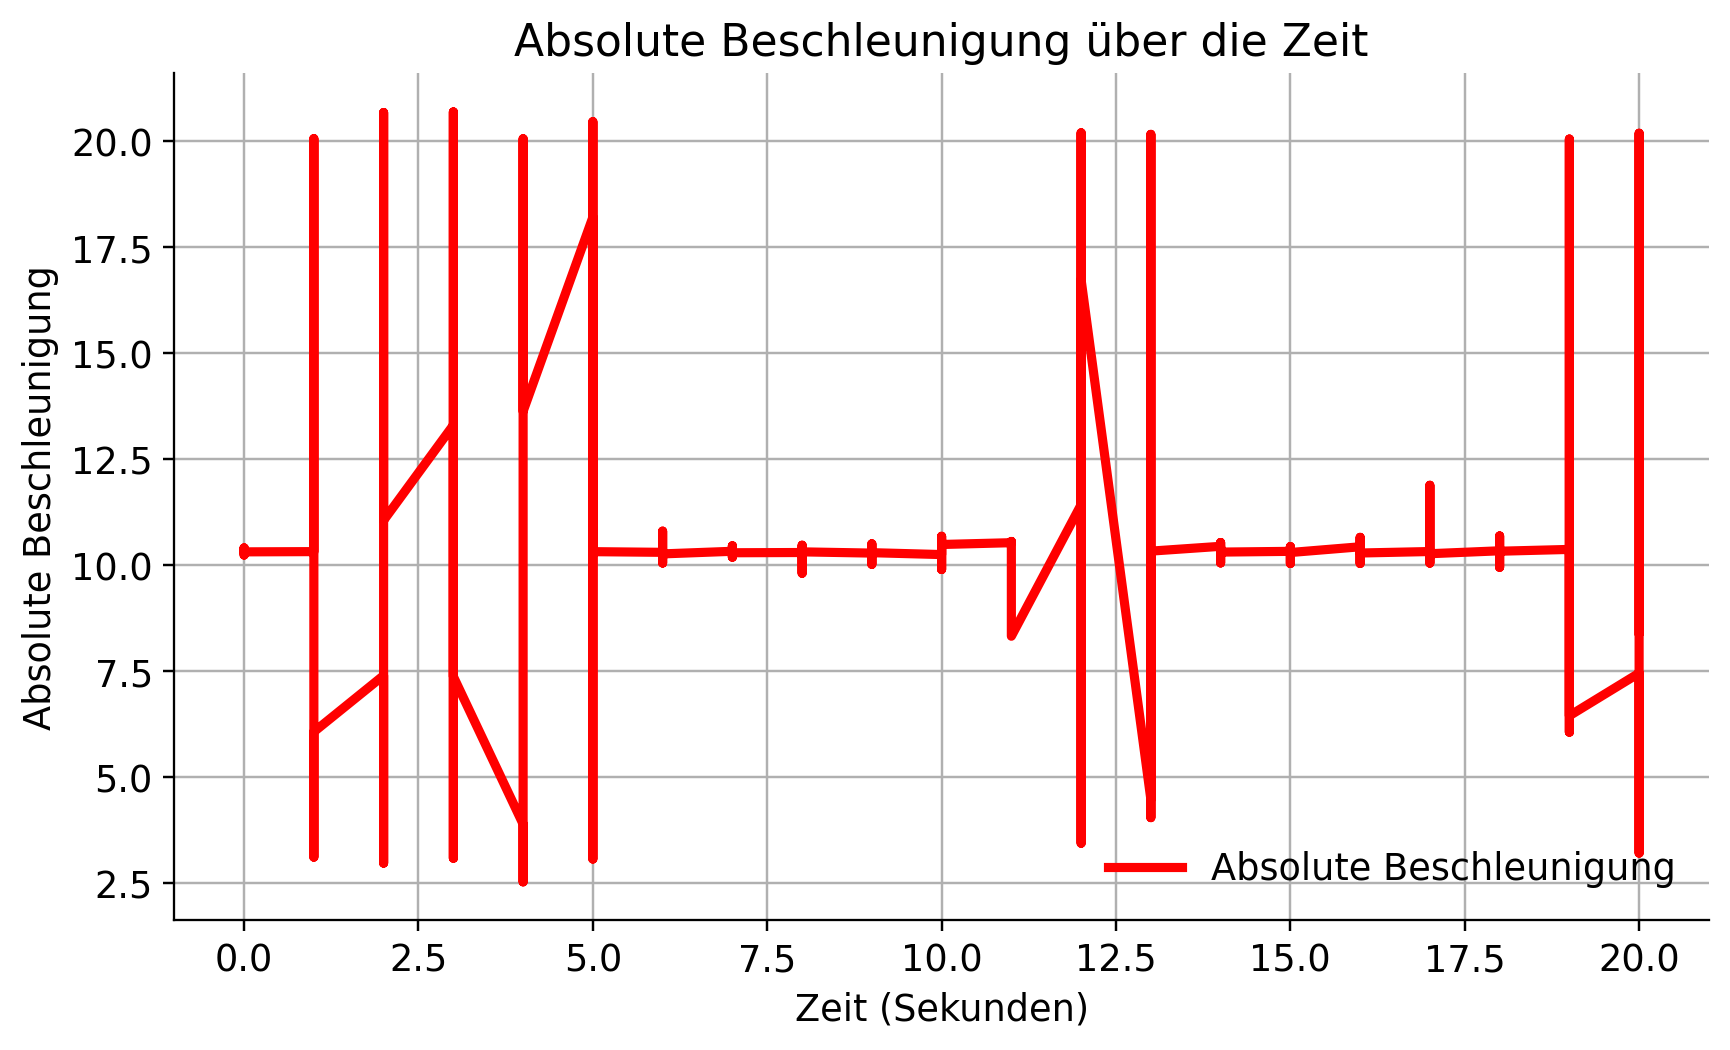

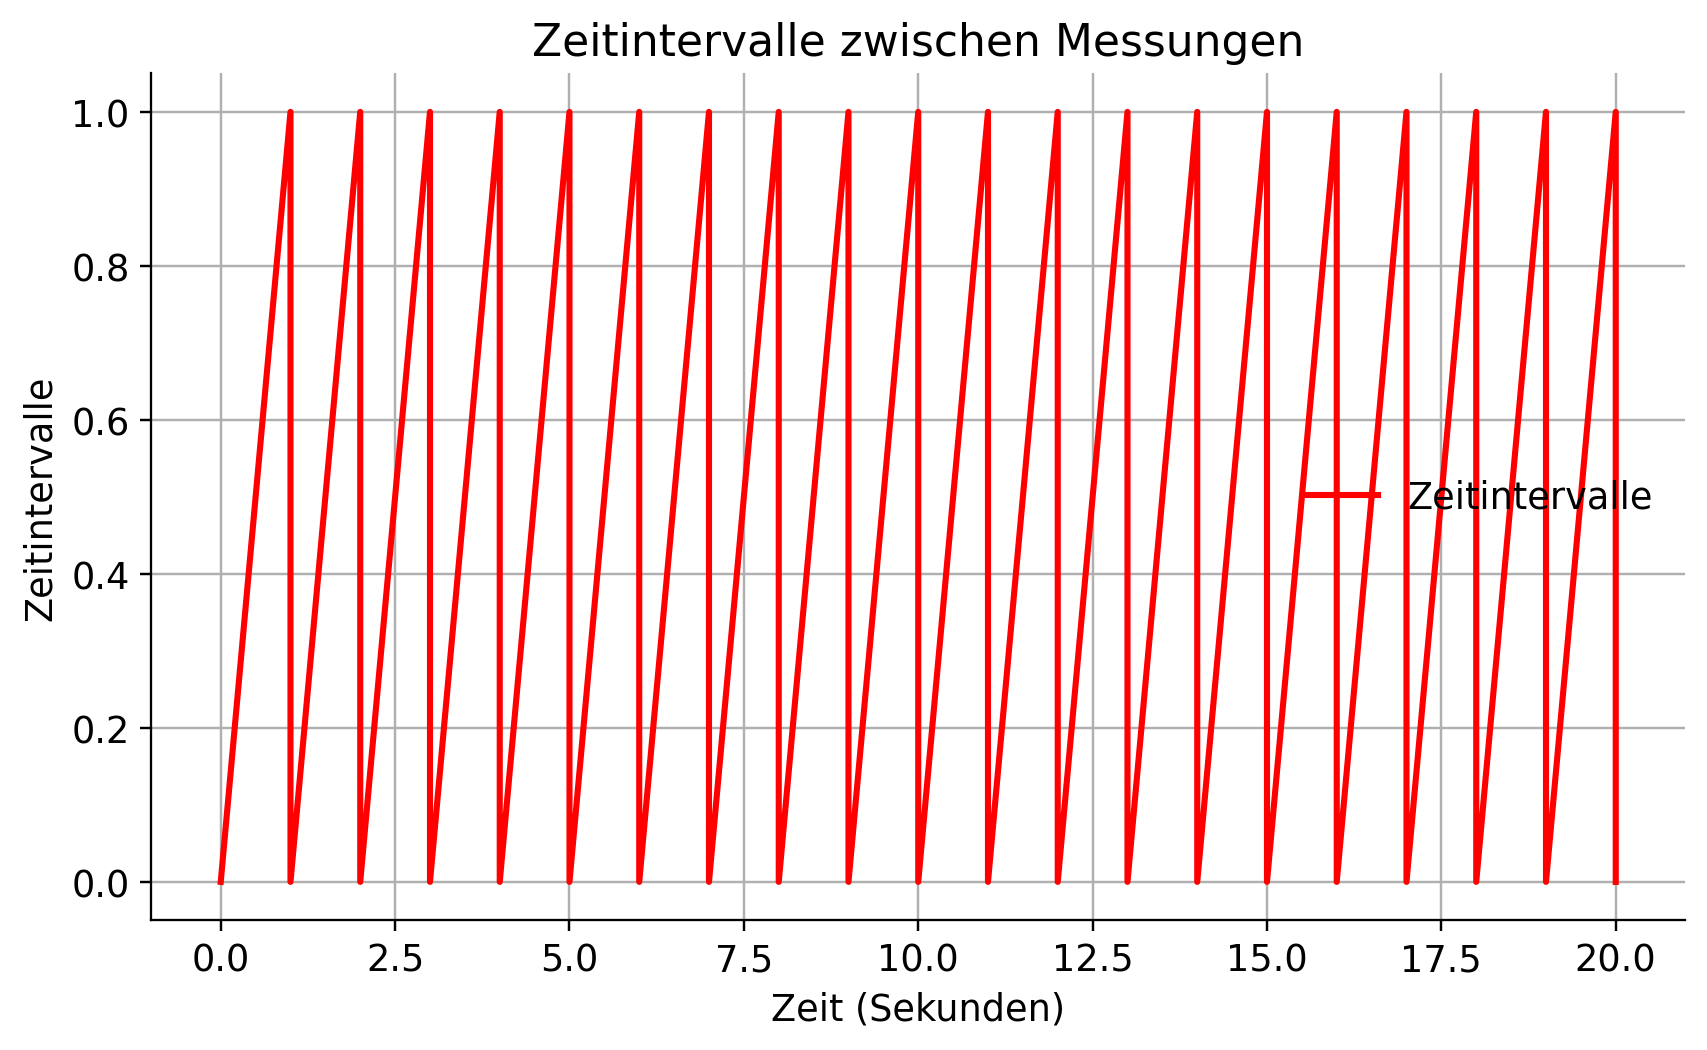

In [10]:
# Darstellung der absoluten Beschleunigung über die Zeit
plt.figure(figsize=(9, 5))
plt.plot(t_np, results, label="Absolute Beschleunigung", color="red", linewidth=3)
plt.title("Absolute Beschleunigung über die Zeit")
plt.xlabel("Zeit (Sekunden)")
plt.ylabel("Absolute Beschleunigung")
plt.legend()
plt.grid(True)
plt.show()

# Darstellung der Zeitintervalle
time_intervals = np.diff(t_np)  # Berechne Zeitintervalle
plt.figure(figsize=(9, 5))
plt.plot(t_np[1:], time_intervals, label="Zeitintervalle", color="red", linewidth=2)
plt.title("Zeitintervalle zwischen Messungen")
plt.xlabel("Zeit (Sekunden)")
plt.ylabel("Zeitintervalle")
plt.legend()
plt.grid(True)
plt.show()


#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [11]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.

equidistant_time_points, interpolated_data = interpolation(t_np, results)

#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

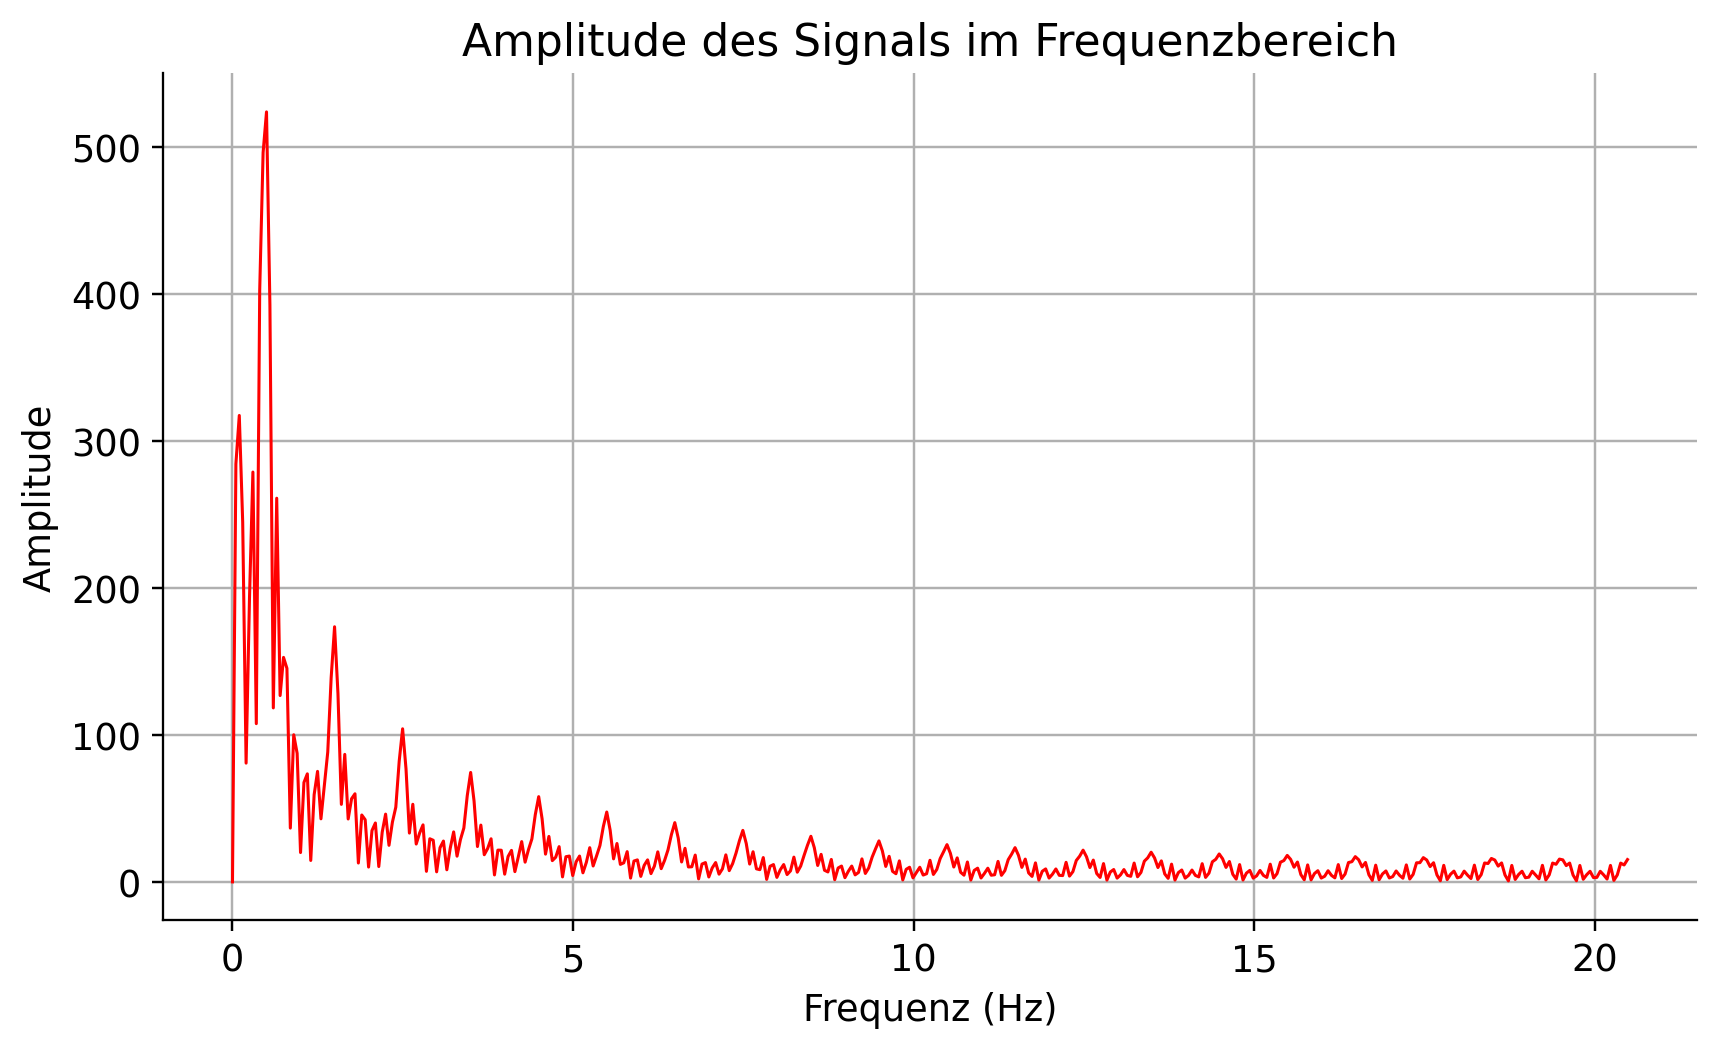

In [14]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# FFT berechnen
amplitude, frequencies = my_fft(interpolated_data, equidistant_time_points)

# Darstellung der Amplitude des Signals im Frequenzbereich
plt.figure(figsize=(9, 5))
plt.plot(frequencies, amplitude, color="red", linewidth=1)
plt.title("Amplitude des Signals im Frequenzbereich")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Zweiter Versuch

Handy

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.


- Bild von Aufbau des Haushaltsgegenstands:

<img src="figures/handy_bild.jpg" width="800">


- Beschreibung des Aufbaus:

Der Schwingungssensor, der mit dem Rasperry Pi verbunden ist, wurde mit Klebeband auf das Handy befestigt.


- Vorgangsbeschreibung:

Bei der Messung wurde ich angerufen (Vibration). Somit wurden 20s lang die Frequenzen des Handys durch den angebrachten Sensor gemessen. 

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [15]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

path_measurement_folder = "measurement_data/data_20231219_171419_NilayKuslugil_handy"
h5_file_name = "data_20231219_171419_NilayKuslugil_handy.h5" 

# ---------------------------------------------------------------------------------------------#1-end

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [16]:
file_path = os.path.join(path_measurement_folder, h5_file_name)
x_np = None
y_np = None
z_np = None
t_np = None

# Öffnen der HDF5-Datei im Lesemodus
with h5py.File(file_path, "r") as hdf_file:
    # Iteration über die Elemente in der Datei
    for group_name, group in hdf_file.items():
        print(f"Group: {group_name}")

        # Iteration über Datensätze in der Gruppe
        for dataset_name, dataset in group.items():
            values = np.array(dataset[:])

            if dataset_name == "acceleration_x":
                x_np = values
            elif dataset_name == "acceleration_y":
                y_np = values
            elif dataset_name == "acceleration_z":
                z_np = values
            elif dataset_name == "timestamp":
                t_np = values

Group: 1ee847be-fddd-6ee4-892a-68c4555b0981


#### 2. Betrag der Beschleunigung berechnen


In [17]:
results = np.empty_like(x_np, dtype=float)

for i, (x_val, y_val, z_val) in enumerate(zip(x_np, y_np, z_np)):
    result = get_vec_accel(x_val, y_val, z_val)
    results[i] = result

#### 3. Darstellung der Messdaten

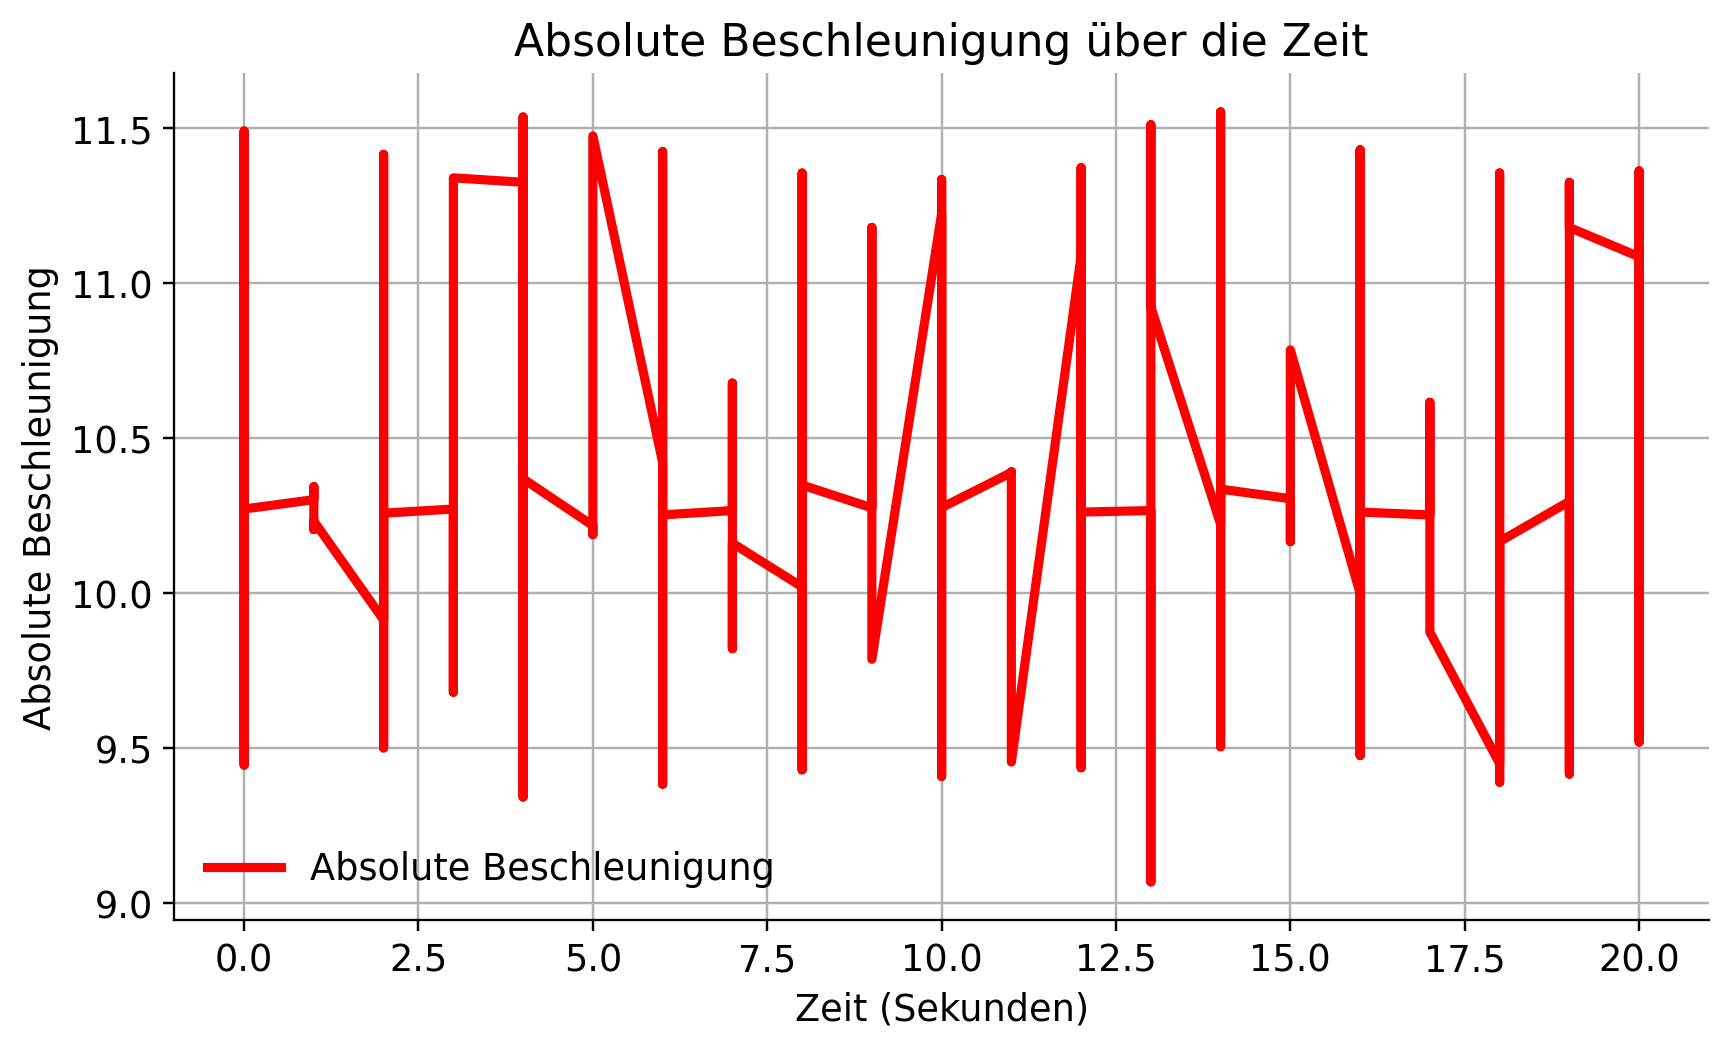

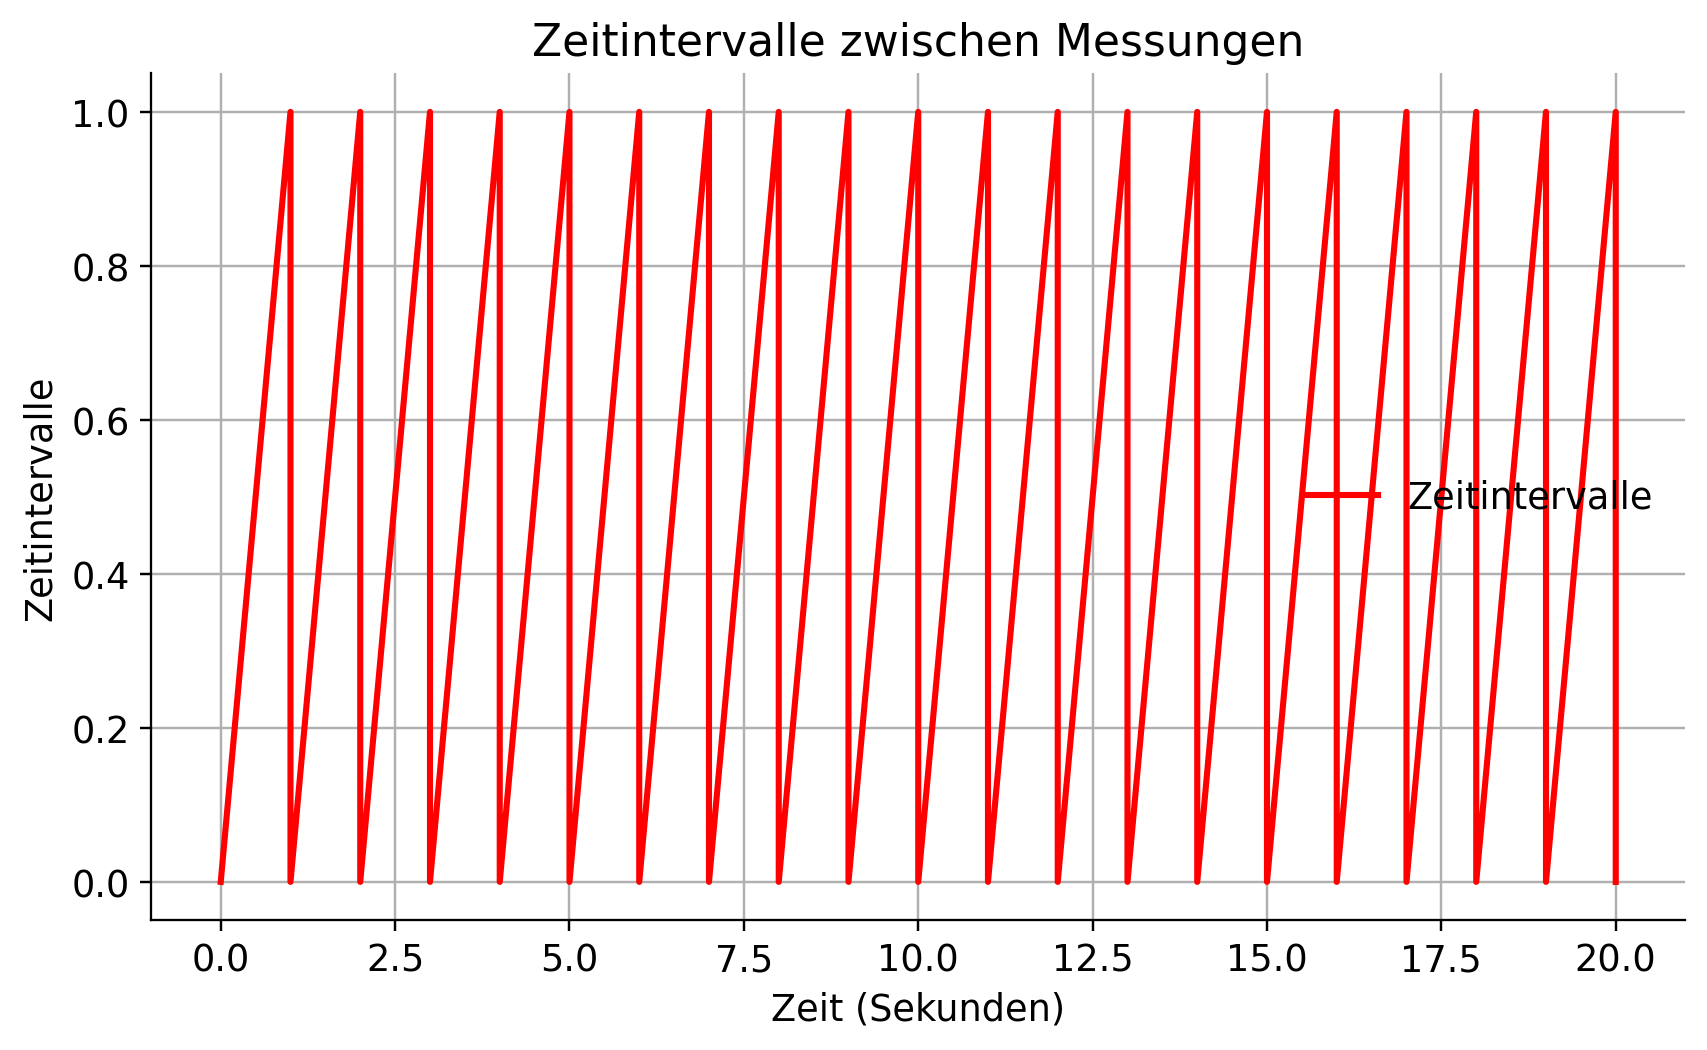

In [19]:
# Darstellung der absoluten Beschleunigung über die Zeit
plt.figure(figsize=(9, 5))
plt.plot(t_np, results, label="Absolute Beschleunigung", color="red", linewidth=3)
plt.title("Absolute Beschleunigung über die Zeit")
plt.xlabel("Zeit (Sekunden)")
plt.ylabel("Absolute Beschleunigung")
plt.legend()
plt.grid(True)
plt.show()

# Darstellung der Zeitintervalle
time_intervals = np.diff(t_np)  # Berechne Zeitintervalle
plt.figure(figsize=(9, 5))
plt.plot(t_np[1:], time_intervals, label="Zeitintervalle", color="red", linewidth=2)
plt.title("Zeitintervalle zwischen Messungen")
plt.xlabel("Zeit (Sekunden)")
plt.ylabel("Zeitintervalle")
plt.legend()
plt.grid(True)
plt.show()


#### 4. Interpolation der Messwerte



In [20]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.

equidistant_time_points, interpolated_data = interpolation(t_np, results)

#### 5 & 6. FFT durchführen und graphisch darstellen


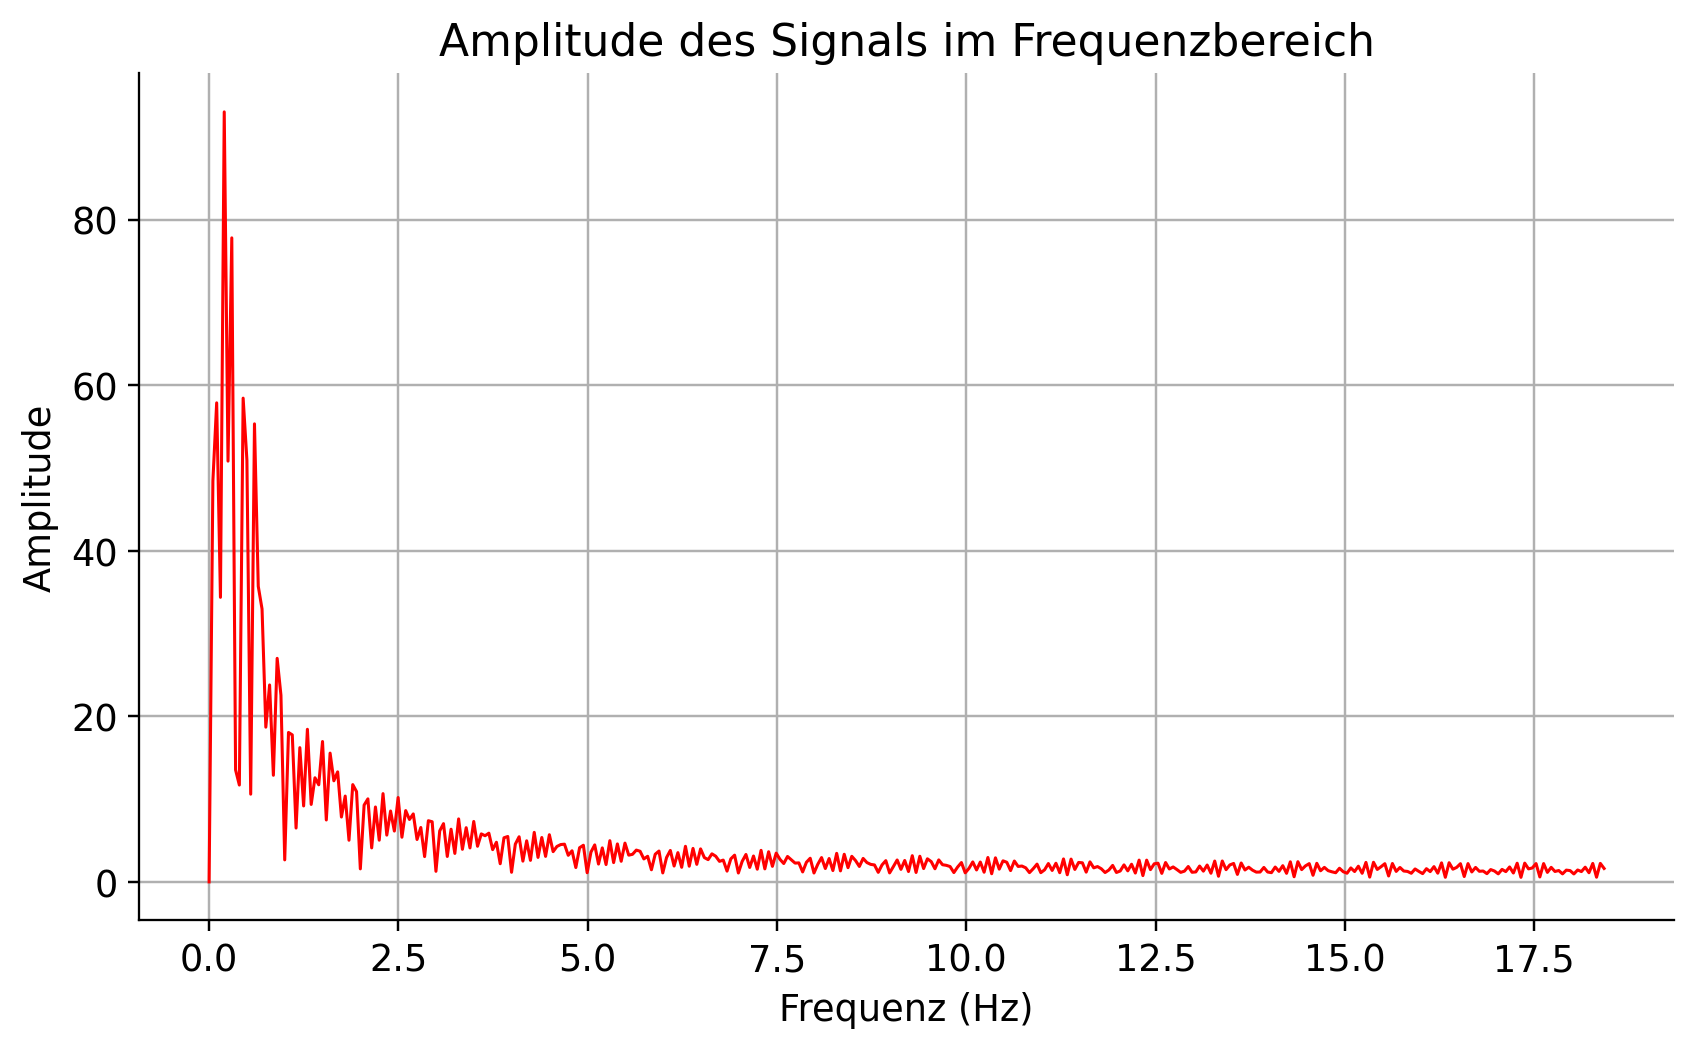

In [25]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# FFT berechnen
amplitude, frequencies = my_fft(interpolated_data, equidistant_time_points)

# Darstellung der Amplitude des Signals im Frequenzbereich
plt.figure(figsize=(9, 5))
plt.plot(frequencies, amplitude, color="red", linewidth=1)
plt.title("Amplitude des Signals im Frequenzbereich")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Ja kann man, beide Proben, also Subwoofer und Handy haben vibriert, und diese Daten wurden wie man sieht durch den Sensor gemessen. Beim Handy war es "kontinuirlicher", beim Abspielen des Liedes beim Subwoofer wurde vor allem am Anfang viel Bass gespielt und dann immer wieder gar kein Bass.  

## Fazit

Der Schwingungssensor hat funktioniert, es hat Spaß gemacht sich zwei verschiedene Sachen auszusuchen und zu messen, die einzelnen Aufgaben konnte ich einigermaßen gut bewältigen, jedoch wurde auch diese Abgabe etwas abgeändert und für uns leichter gemacht, deshalb wars wahrscheinlich ganz angemessen für eine Abgabe.